### Table of Contents
* [1. Einleitung](#einleitung)
* [2. Datenanalyse](#datenanalyse)
    - [2.1 Welche empirischen Forschungsmethoden verwenden Forscher im Bereich des RE?](#q1)
    - [2.2 Wie hat sich die Nutzung dieser Forschungsmethoden in den letzten Jahren geändert?](#q2)
    - [2.3 Wie hoch ist der Anteil bei der Verwendung von Umfragen, Fallstudien und Action Research im RE?](#q3)
    - [2.4 Wie hat sich die Nutzung dieser drei Methoden(Umfrage, Fallstudie, Aktionsforschung) in den vergangenen Jahren entwickelt?](#q4)
    - [2.5 Welche statistische Methoden werden in der Forschung im RE verwendet?](#q5)
    - [2.6 Wie hat sich die Nutzung der statistischen Methoden in den letzten Jahren geändert?](#q6)
    - [2.7 Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffentlicht? Wenn ja, welche Daten werden veröffentlicht?](#q7)
    - [2.8 Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt?](#q8)
    - [2.9 Wie hoch ist der Anteil von systematischen Studien(SLR, mapping study...)?](#q9)
    - [2.10 Verwenden Forschungen mehr als eine Forschungsmethode?](#q10)
    - [2.11 Welche Forschungsmethoden werden Kombiniert?](#q11)
    - [2.12 Welche Kombinationen aus Datensammlungsmethoden und Analysemethoden werden verwendet?](#q12)
* [3. Fazit](#fazit)

## 1. Einleitung <a class="anchor" id="einleitung"></a>
In meiner Bachelorarbeit zum Thema "Akquirierung und Analyse von Forschungspraktiken mittels semantischer Strukturen" gehe ich den verwandten Arbeiten auf die Arbeit "The Future of Empirical Methods in Software Engineering Research" von Sjoberg et al. ein. Sie stellen in ihrer Arbeit Herausforderungen der empirischen Forschung dar. Für jede diese Herausforderungen wurde zum einen der aktuelle Stand der Praxis beschrieben und zum anderen Visionen dargestellt, wie sie sich diesen Stand in der Zukunft (2020-2025) vorstellen. In meiner Arbeit habe ich aus diesen Herausforderungen und Visionen Fragen abgeleitet, die in zusammenarbeit mit meinem Betreuer Dr. Oliver Karras überprüft und überarbeitet wurden. In diesem Jupyter Notebook werden einige dieser Fragen mit der aktuellen entwickelten Semantischen Struktur und den damit gesammelten Daten beantwortet. 
Die gesammelten Daten kommen dabei von Publikationen aus dem Research Track der jährlich stattfindenden IEEE International Requirements Engineering Conference. Aktuell wurden 168 Publikationen aus den Jahren 2015-2021 untersucht und im Open Research Knowledge Graph (ORKG) gesammelt. Der ORKG ist ein Forschungswissensgraph und ein Projekt der TIB der Uni Hannover, um Daten langfristig aufzubereiten und zur Verfügung zu stellen. Auf die gesammelten Daten kann mittels SPARQL zugegriffen, um mit den Daten die aufgestellten Fragen zu beantworten.

## 2. Datenanalyse <a id="datenanalyse"></a>

In [2]:
import sparql_dataframe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

endpoint_url = "https://orkg.org/triplestore"

PREFIX = """
        PREFIX orkgr: <http://orkg.org/orkg/resource/>
        PREFIX orkgc: <http://orkg.org/orkg/class/>
        PREFIX orkgp: <http://orkg.org/orkg/predicate/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        """

### 2.1 Welche empirischen Forschungsmethoden verwenden Forscher im Bereich des RE? <a id="q1"></a>

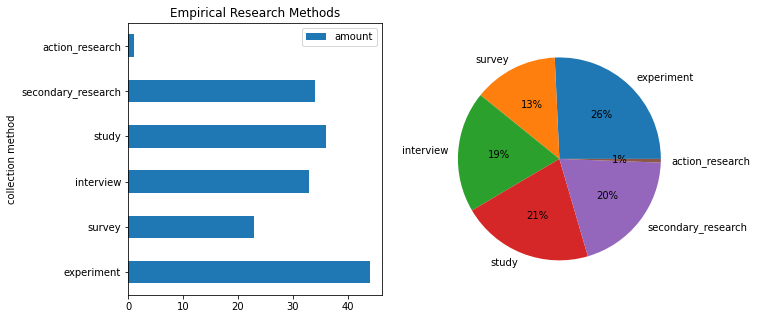

In [77]:
query = """
        SELECT ?year, ?experiment, ?survey, ?interview, ?study, ?secondary_research, ?action_research
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              ?paper orkgp:P29 ?year.
              ?contribution rdfs:label ?contribution_name.
              ?contribution orkgp:P56008 ?data_collection_method.
              OPTIONAL{?data_collection_method orkgp:P1007/rdfs:label ?experiment}
              OPTIONAL{?data_collection_method orkgp:P57036/rdfs:label ?survey}
              OPTIONAL{?data_collection_method orkgp:P57034/rdfs:label ?interview.}
              OPTIONAL{?data_collection_method orkgp:P57040/rdfs:label ?study.}
              OPTIONAL{?data_collection_method orkgp:P57021/rdfs:label ?secondary_research.}
              OPTIONAL{?data_collection_method orkgp:P57020/rdfs:label ?action_research.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
#get oldest year
start_year = data.sort_values(by=['year'])['year'].iloc[0]
cm = []
values = []
for col in range(1, len(data.columns)):
        cm.append(data.columns[col])
        values.append(data[data.columns[col]].value_counts().sum())
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(10,5))
research_methods = pd.DataFrame(data={'collection method': cm, 'amount':values})
research_methods.plot(kind='barh', x='collection method', y='amount', title="Empirical Research Methods", ax=ax)
plt.pie(research_methods['amount'], labels=research_methods['collection method'], autopct='%1.0f%%')
plt.show()


Im linken Diagramm werden die empirischen Methoden dargestellt, die Forscher in ihren Studien im Bereich des RE verwendet haben. Forscher verwenden hierbei mit über 40-mal am häufigsten Experimente als Forschungsmethode. Die Forschungsmethoden Studien, Umfragen sowie sekundäre Forschung werden über 30-mal genutzt, Umfragen über 20-mal. Nur 1-mal wurde Aktionsforschung als Forschungsmethode verwendet.<br>
Das rechte Diagramm stellt die Anteile dar, welche die einzelnen Forschungsmethoden besitzen. Experimente haben den größten Anteil mit 26%, Studien 21%, sekundäre Forschung 20%, Interviews 19%, Umfragen 13% und Aktionsforschung hat nur einen Anteil von 1%. 

<AxesSubplot:title={'center':'Action Research Methods'}>

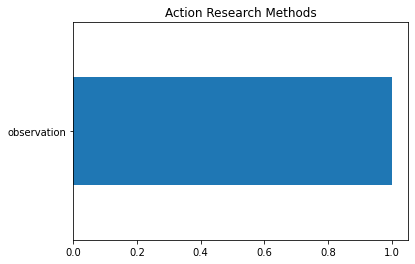

In [4]:
#action research methods
data['action_research'].value_counts().plot(kind='barh', title="Action Research Methods")

<AxesSubplot:title={'center':'Secondary Research Methods'}>

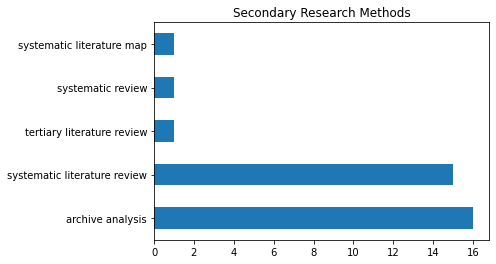

In [5]:
#secondary research methods
data['secondary_research'].value_counts().plot(kind='barh', title="Secondary Research Methods")

Dieses Diagramm zeigt, welche unterschiedlichen Forschungsmethoden in der sekundären Forschung verwendet werden. Forscher verwenden dabei am häufigsten Archiv Analysen mit über 15 Mal und systematische Literaturrecherchen. Tertiäre Literaturrecherche, systematic literature Map und Systematisches Review wurden jeweils nur einmal verwendet.

<AxesSubplot:title={'center':'Study Methods'}>

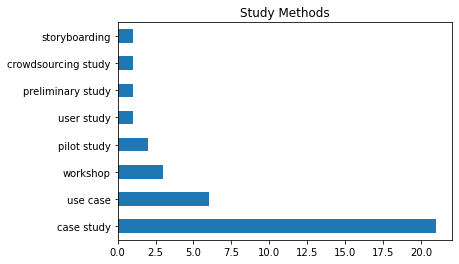

In [6]:
#study methods
data['study'].value_counts().plot(kind='barh', title="Study Methods")

Das Diagramm zeigt, welche unterschiedlichen Forschungsmethoden in Studien verwendet werden. Hierbei wurde über 20 Mal Fallstudien als Forschungsmethode genutzt, gefolgt von Use cases mit über fünfmal, workshops mit und Pilot Studien. Crowdsourcing Studien, preliminary Studien, Benutzer Studien sowie Storyboarding wurden nur einmal als Forschungsmethode genutzt.

<AxesSubplot:title={'center':'Interview Methods'}>

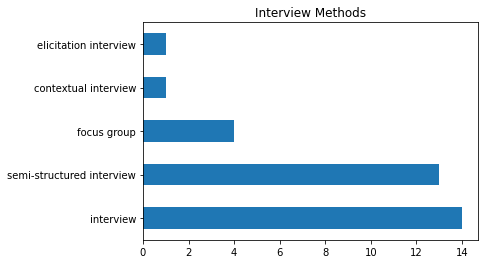

In [7]:
#interview methods
data['interview'].value_counts().plot(kind='barh', title="Interview Methods")

Dieses Diagramm zeigt, welche unterschiedlichen Interviewmethoden verwendet werden. Dabei wird am häufigsten das klassische Interview mit 14 Mal genutzt, gefolgt von semi-structured Interviews mit 12 Mal. Fokusgruppen wurden viermal als Forschungsmethode verwendet, contextual Interviews, elicitation Interviews und self-administered Interviews wurden nur einmal genutzt.

<AxesSubplot:title={'center':'Survey Methods'}>

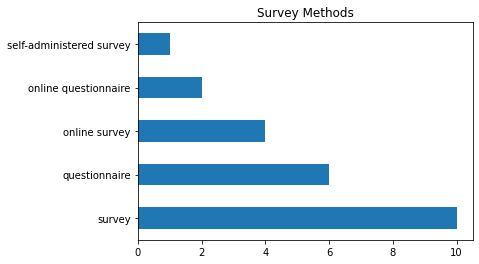

In [8]:
#survey methods
data['survey'].value_counts().plot(kind='barh', title="Survey Methods")

Das Diagramm zeigt, welche unterschiedlichen Umfragemethoden verwendet werden. Dabei werden am häufigsten Umfagen mit 10-mal genutzt, gefolgt von Fragebögen mit 6-mal. Online Umfragen wurden 4-mal als Forschungsmethode verwendet und Online Fragebögen wurden 2-mal als Forschungsmethode genutzt.

<AxesSubplot:title={'center':'Experiment Methods'}>

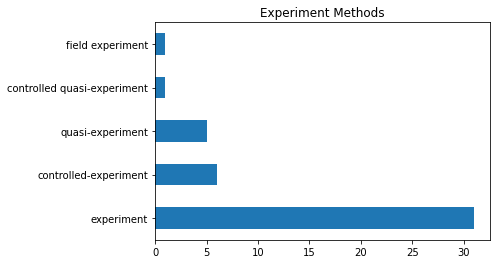

In [9]:
#experiment methods
data['experiment'].value_counts().plot(kind='barh', title="Experiment Methods")

Das Diagramm zeigt, welche unterschiedlichen Experiment verwendet werden. Mit über 30-mal wurden Experimente verwendet. Kontrollierte Experimente wurden 4-mal genutzt, gefolgt von Quasi-Experimenten, die 4-mal genutzt wurden. Die Methoden Feldexperimente und Kontrollierte Quasi-Experimente wurden jeweils nur 1-mal verwendet.

### 2.2 Wie hat sich die Nutzung dieser Forschungsmethoden in den letzten Jahren geändert? <a id="q2"></a>

<AxesSubplot:title={'center':'Action Research usage since 2015'}, xlabel='year'>

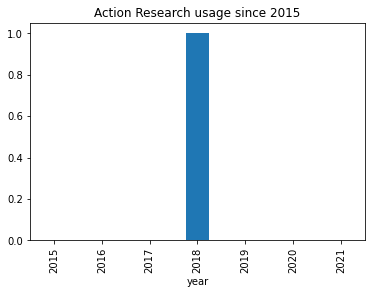

In [37]:
data.groupby('year')['action_research'].count().plot(kind='bar', title='Action Research usage since {year}'.format(year=start_year))

<AxesSubplot:title={'center':'Secondary Research usage since 2015'}, xlabel='year'>

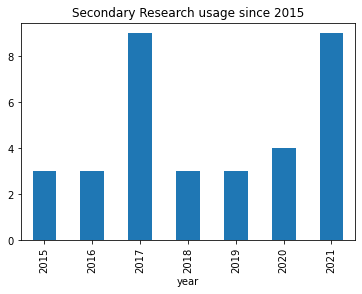

In [38]:
data.groupby('year')['secondary_research'].count().plot(kind='bar', title='Secondary Research usage since {year}'.format(year=start_year))

Dieses Diagramm stellt dar, wie häufig sekundäre Forschung im Zeitraum zwischen 2015-2021 genutzt wurden. Die Nutzung ist dabei beständig und wird in den Jahren 2015-2020 zwischen 3- und 4-mal verwendet, mit Ausnahme von 2017. Dort erreicht die Nutzung ein maximum von 9-mal. Die Verwendnung von sekundärer Forschung steigt im Jahr 2021 ebenfalls auf das maximum von 9-mal an. 

<AxesSubplot:title={'center':'Study usage since 2015'}, xlabel='year'>

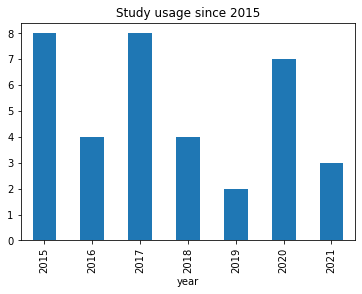

In [39]:
data.groupby('year')['study'].count().plot(kind='bar', title='Study usage since {year}'.format(year=start_year))

Dieses Diagramm stellt dar, wie häufig Studien im Zeitraum zwischen 2015-2021 genutzt wurden. 2015 wurde diese Forschungsmethode 8-mal verwendet und sinkt im darauffolgenden Jahr auf 4-mal ab. Im Jahr 2017 steigt die Nutzung wieder auf das maximum von 8-mal an und sinkt in den zwei folgenden Jahren auf ein minimum von 2-mal. Danach steigt die Nutzung wieder an auf 7-mal und sinkt im Jahr darauf wieder auf eine Nutzung von 3-mal. 

<AxesSubplot:title={'center':'Interview usage since 2015'}, xlabel='year'>

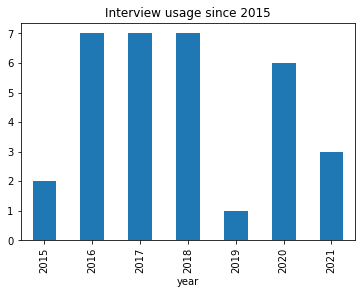

In [40]:
data.groupby('year')['interview'].count().plot(kind='bar', title='Interview usage since {year}'.format(year=start_year))

Dieses Diagramm stellt dar, wie häufig Interviews im Zeitraum zwischen 2015-2021 genutzt wurden. Im Jahr 2015 wurden Interview Methoden 2-mal verwendet. In den drei darauffolgenden Jahren bleibt die Nutzung im maximum und wurde dabei 7-mal verwendet. 2019 sinkt die Nutzung auf ein minimum von 1-mal und steigt 2020 wieder auf 6-mal an. Im Jahr 2021 sinkt die Verwendung dieser Forschungsmethode wieder auf 3-mal.

<AxesSubplot:title={'center':'Survey usage since 2015'}, xlabel='year'>

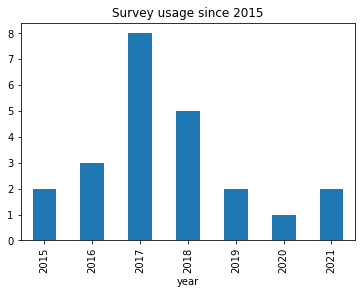

In [41]:
data.groupby('year')['survey'].count().plot(kind='bar', title='Survey usage since {year}'.format(year=start_year))

Dieses Diagramm stellt dar, wie häufig Umfragemethoden im Zeitraum zwischen 2015-2021 genutzt wurden. Im Jahr 2015 wurden Umfragen 2-mal verwendet. Bis 2017 steigt die Nutzung dieser Forschungsmethode auf ein maximum und wurde dort 8-mal genutzt. Seit 2018 sinkt die Nutzung und erreicht in den Jahren 2020-2021 ein minimum und wird dort nur jeweils 1-mal genutzt.

<AxesSubplot:title={'center':'Experiment usage since 2015'}, xlabel='year'>

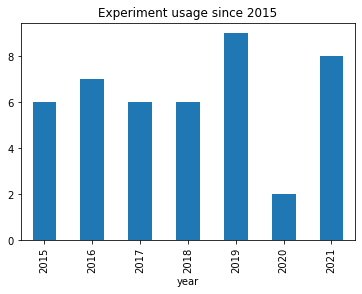

In [42]:
data.groupby('year')['experiment'].count().plot(kind='bar', title='Experiment usage since {year}'.format(year=start_year))

Dieses Diagramm stellt dar, wie häufig Experimente im Zeitraum zwischen 2015-2021 genutzt wurden. Die Nutzung dieser Forschungsmethode bleibt in den Jahren 2015-2018 beständig und wurde zwischen 6- und 7-mal verwendet. Im Jahr 2019 steigt die Nutzung auf ein maximum von 9-mal an und sinkt im darauffolgenden Jahr auf ein minimum von 2-mal. 2021 steigt die Verwendung wieder auf 8-mal an.

<AxesSubplot:title={'center':'Change of method usage since 2015 (all methods)'}, xlabel='year'>

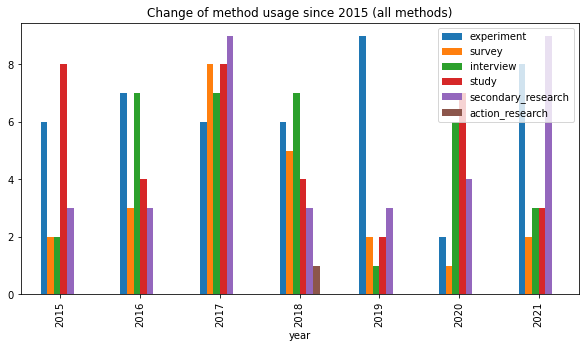

In [16]:
data.groupby(['year']).count().plot(kind='bar', figsize=(10,5), title='Change of method usage since {year} (all methods)'.format(year=start_year))

Dieses Diagramm stellt noch einmal die Nutzung der Forschungsmethoden Aktionsforschung, Umfragen, Interviews, Studien, sekundäre Forschung und Experimente im Zeitraum zwischen 2015-2021 dar in einer Übersicht dar. 

### 2.3 Wie hoch ist der Anteil bei der Verwendung von Umfragen, Fallstudien und Action Research im RE? <a id="q3"></a> 

<AxesSubplot:ylabel='research methods'>

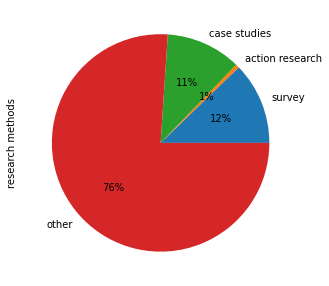

In [17]:
query = """
        SELECT ?year, ?surveys, ?action_research, ?case_studies
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?contribution orkgp:P56008 ?collection.
              ?paper orkgp:P29 ?year.
              OPTIONAL{?collection orkgp:P57036 ?surveys.}
              OPTIONAL{?collection orkgp:P57020 ?action_research.}
              OPTIONAL{?collection orkgp:P57040/rdfs:label ?case_studies.
                FILTER regex(?case_studies, "case study", "i")}
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_of_survey = data['surveys'].value_counts().sum()
number_of_action_research = data['action_research'].value_counts().sum()
number_of_case_studies = data['case_studies'].value_counts().sum()
all = number_of_action_research + number_of_case_studies + number_of_survey
method_data = pd.DataFrame({'research methods':[number_of_survey, number_of_action_research, number_of_case_studies, len(data) - all]}, index=['survey', 'action research', 'case studies', 'other'])
method_data.plot(kind='pie',  y='research methods', autopct='%1.0f%%', figsize=(5,5), legend=False)

Dieses Diagramm stellt das Verhältnis der Forschungsmethoden Fallstudien, Umfragen und Aktionsforschung im Vergleich zu den anderen verwendeten Forschungsmethoden dar. Wie auch schon zuvor festgestellt, wird Aktionsforschung sehr wenig genutzt und hat mit nur einen 1% einen sehr geringen Anteil bei der Verwendung von Methoden. Mit einem Anteil von 11% bei Fallstudien und 12% bei Umfragen, ist der Anteil der beiden Methoden fast gleich verteilt. Insgesamt machen diese drei Methoden fast ein Viertel der verwendeten Forschungsmethoden in den gesammlten Daten im RE aus.

### 2.4 Wie hat sich die Nutzung dieser drei Methoden(Umfrage, Fallstudie, Aktionsforschung) in den vergangenen Jahren entwickelt? <a id="q4"></a>

<AxesSubplot:xlabel='year'>

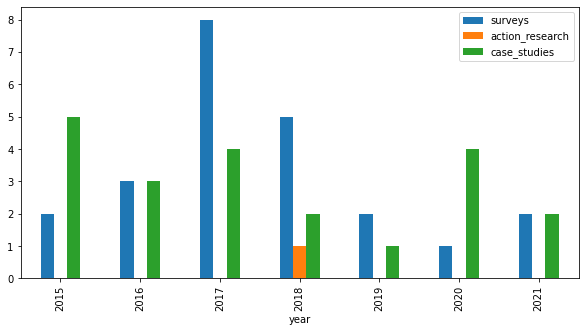

In [18]:
data.groupby('year').count().plot(kind='bar', figsize=(10,5))

Das Diagramm stellt dar, wie sich die Nutzung der Methoden Fallstudien, Umfragen und Aktionsforschung im Zeitraum von 2015-20201 verändert hat. Die Verwendung von Fallstudien ist in den Jahren 2015-2017 schwankend und sinkt ab 2018, mit einem minimum von 1-mal in 2019. 2020 steigt die Nutzung auf 4-mal und hat ab 2021 wieder eine sinkende Tendenz und wurde dort nur 2-mal verwendet. Für Umfragen ist erkennbar, dass es bis 2017 einen Anstieg bei der Nutzung dieser Forschungsethode gab, mit einem maximum und einer Nutzung von 8-mal im Jahr 2017. Ab 2018 ist die Tendenz bei der Verwendung von Umfragen sinkend und erreicht im Jahr 2020 ein minimum von 1-mal. 2021 wurde diese Methode wieder 2-mal verwendet. Action Research hingegen wurde nur 1-mal als Forschungsmethode gewählt, sodass hier eine Aussage über die Tendenz nicht möglich ist. 

### 2.5 Welche statistische Methoden werden in der Forschung im RE verwendet? <a id="q5"></a>

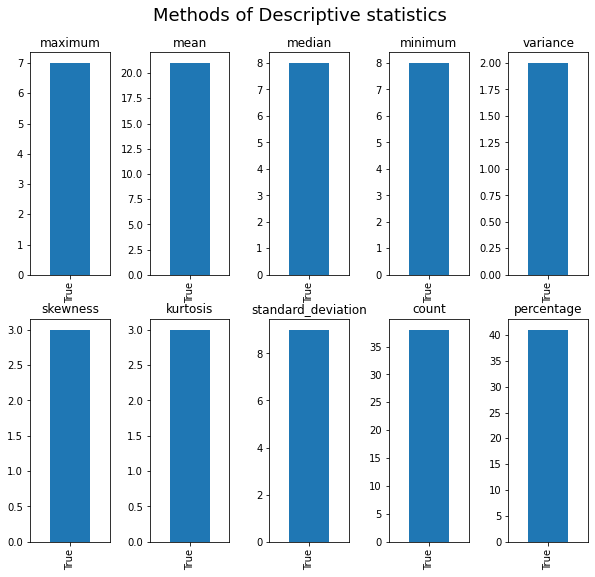

In [19]:
query = """
        SELECT ?year, ?maximum, ?mean, ?median, ?minimum, ?variance, ?skewness, ?kurtosis, ?standard_deviation, ?count, ?percentage, ?hypothesis_tests, ?regression
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper orkgp:P29 ?year.
              ?contribution orkgp:P15124 ?analysis.
              OPTIONAL{?analysis orkgp:P56048 ?descriptive.
                OPTIONAL{?descriptive orkgp:P57005 ?tendency.
                    ?tendency orkgp:P44108 ?maximum.
                    ?tendency orkgp:P47000 ?mean.
                    ?tendency orkgp:P57006 ?median.
                    ?tendency orkgp:P44107 ?minimum.
                    ?tendency orkgp:P57007 ?mode.}
                OPTIONAL{?descriptive orkgp:P57008 ?dispersion.
                    ?dispersion orkgp:P4013  ?range.
                    ?dispersion orkgp:P44087 ?standard_deviation.
                    ?dispersion orkgp:P57009 ?variance.
                    ?dispersion orkgp:P59063 ?skewness.
                    ?dispersion orkgp:P59064 ?kurtosis.}
                OPTIONAL{?descriptive orkgp:P56049 ?frequency.
                    ?frequency orkgp:P55023 ?count.
                    ?frequency orkgp:P56050 ?percentage.}
                }
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56044/rdfs:label ?hypothesis_tests.}
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56045/rdfs:label ?regression.}    
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
start_year = data.sort_values('year')['year'].iloc[0]
descriptive = data.iloc[:, 1:11]
#plot descriptive methods
plt.figure(figsize=(10,9))
plt.subplots_adjust(wspace=0.5)
plt.suptitle("Methods of Descriptive statistics", fontsize=18, y=0.95)
for n, col in enumerate(descriptive.columns):
    ax = plt.subplot(2, 5, n + 1)
    if descriptive[descriptive[col] == True][col].sum() > 0:
        descriptive[descriptive[col] == True][col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)


In der deskriptive Statistik verwenden Forscher eine Vielfalt von verschiedenen statistischen Analyse Methoden. Dabei wird die Angabe von Prozenten mit 40-mal am häufigsten verwendet gefolgt von Zählungen mit 36 Mal am häufigsten. Der Durchschnitt wurde 20-mal verwendet. Median, minimum und standard Abweichung wurden 8-mal für die Analyse verwendet, die Methode maximum 7-mal. Die Methoden Skewness und Kurtosis wurden jeweils 3-mal verwendet. Varianz wurde mit 2-mal am wenigsten verwendet.

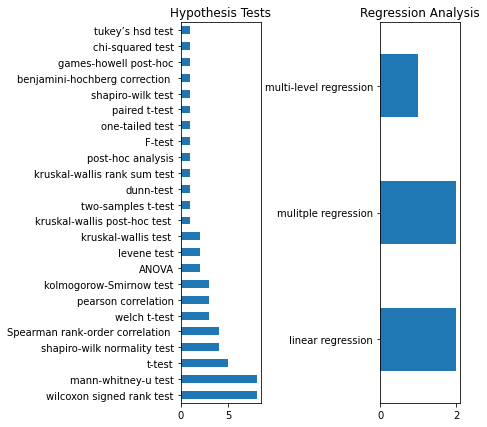

In [20]:
#plot inferential methods
fig, (ax, ax2) = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=1.5)
data['hypothesis_tests'].value_counts().plot(kind='barh', figsize=(5,7), title='Hypothesis Tests', ax=ax)
data['regression'].value_counts().plot(kind='barh', title='Regression Analysis', ax=ax2)
plt.show()

In dem Diagramm zu Hypothesen Tests ist zusehen, dass Forscher eine große Vielfalt unterschiedlicher Tests verwenden. Die fünf meist genutzten Tests sind der Wilcoxon signed-rank test, und der Mann-Whitney-U-Test verwendet, mit einer Nutzung von über 5-mal, gefolgt vom t-Test mit 5-mal und der Spearman rank-order correlation sowie dem Shapiro-wilk normality Test mit 4-mal. Bei der Regressionsanalyse werden die Methoden multi-level, multiple, und lineare Regression verwendet, diese machen mit insgesamt nur fünf Verwendungen einen geringen Anteil in der Analyse aus.

### 2.6 Wie hat sich die Nutzung der statistischen Methoden in den letzten Jahren geändert? <a id="q6"></a>

<AxesSubplot:title={'center':'Usage of Descriptive Statistic Methods since 2015'}, xlabel='year'>

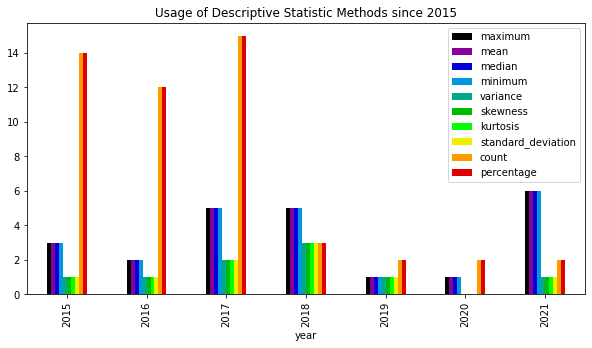

In [21]:
#descriptive methods over years
descriptive = data.iloc[:, :11]
colormap = plt.cm.nipy_spectral 
colors = [colormap(i) for i in np.linspace(0, 0.9, 10)]
descriptive.groupby('year').count().plot(kind='bar', figsize=(10,5), color=colors, title='Usage of Descriptive Statistic Methods since {year}'.format(year=start_year))

In diesem Diagramm wird die zeitliche Veränderung bei Nutzung von deskriptiven Analyse Methoden dargestellt. Hierbei ist auffällig, dass die Angabe von Prozenten und Zählungen in den Jahren 2015-2017 sehr hoch gewesen ist, aber im Jahr 2018 sehr stark abgesunken ist und seitdem auch nur sehr wenig genutzt wird. Die Verwendung der Methoden maximum, minimum, Median und Durchschnitt ist, mit Ausnahme von 2016, bis 2018  von 3-mal auf 5-mal gestiegen. In den zwei folgenden Jahren ist die Nutzung auf ein minimium von 1-mal gesunken. Im Jahr 2021 erreicht die Nutzung dieser Methoden ein maximum von 6-mal. Die Methoden Varianz, skewness, kurtosis und standard Abweichung steigen bis 2018 an und wurden 5-mal verwendet, sinken dann aber in den darauffolgenden Jahren wieder ab. Im Jar 2020 wurden diese Methoden gar nicht verwendet. 2021 wurden diese Methoden 1-mal verwendet.

<AxesSubplot:title={'center':'Usage of Inferential Statistic Methods since 2015'}, xlabel='year'>

<Figure size 432x288 with 0 Axes>

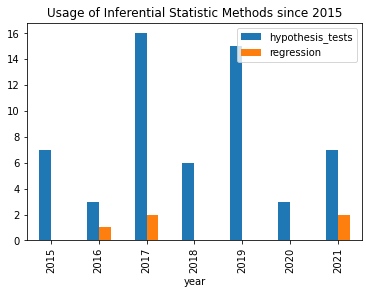

In [22]:
#inferential methods over years
plt.figure()
data.groupby('year')[['hypothesis_tests', 'regression']].count().plot(kind='bar', title='Usage of Inferential Statistic Methods since {year}'.format(year=start_year))

Dieses Diagramm zeigt wie häufig Hypothesentests und Regressionsanalyse im Zeitraum von 2015-2021 verwendet wurden. 2015 wurden Hypothesentests 7-mal verwendet. Die Nutzung sinkt danach auf 3-mal im Jahr 2016. 2017 steigt die Nutzung sehr stark und erreicht ein maximum von 16-mal und sinkt im darauffolgenden Jahr auch wieder stark und wurde nur noch 6-mal verwendet. 2019 stiegt die Nutzung mit 15-mal wieder stark an, sinkt danach wieder stark und erreicht im darauffolgenden Jahr ein minimum von 3-mal. 2021 steigt die Nutzung wieder auf 7-mal an.

### 2.7 Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffentlicht? Wenn ja, welche Daten werden veröffentlicht? <a id="q7"></a>

<AxesSubplot:title={'center':'Provided data'}>

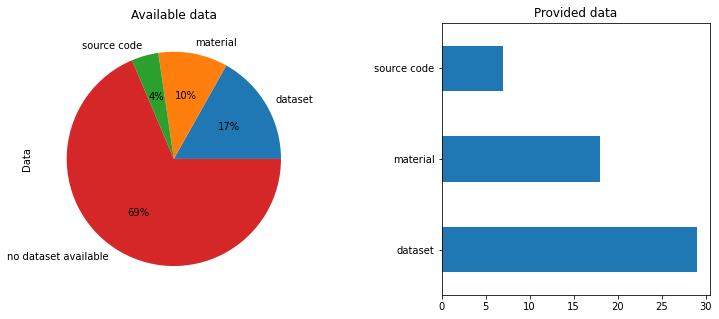

In [23]:
query = """
        SELECT ?contribution, ?data
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              OPTIONAL{?contribution orkgp:P56008/orkgp:DATA/orkgp:P17001/rdfs:label ?data.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)

#overall available data
available_data_number = data['data'].value_counts().sum()

#get datatypes with amount of usage
d = data['data'].value_counts()
data_type = []
data_number = []
for i in range(len(d)):
    data_type.append(d.index[i])
    data_number.append(d[i])

#add number of contributions that have no dataset
data_type.append('no dataset available')
data_number.append(len(data) - available_data_number)

available_data = pd.DataFrame({'Data':data_number}, index=data_type)

#plot data
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
available_data.plot(kind='pie', y='Data', autopct='%1.0f%%', title="Available data", legend=False, ax=ax) 
data['data'].value_counts().plot(kind='barh', title="Provided data", ax=ax2)

Im linken Diagramm wird gezeigt, zu welchem Anteil Forscher Rohdaten, Materialien und auch Ergebnisse über ihre Studie veröffentlichen. Dabei wurden insgesamt 31% Prozent der Forschungsdaten veröffentlicht. Mit 17% wurden am häufigsten Datensätze, wie z.B. Tabellen mit Ergebnissen, veröffentlicht. Materialien, wie interviewfragen oder eine Anleitung zum Ablauf der Studie, haben einen Anteil von 10%. Source Code wurde zu einem Anteil von 4% veröffentlicht.<br>
Das rechte Diagramm stellt dar, welche Daten wie oft veröffentlicht wurden. Datensätze wurden über 25-mal Datensätze veröffentlicht, Materialien über 15-mal und der Source Code einer Forschung wurde insgesamt über 5-mal zur Verfügung gestellt.

### 2.8 Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt? <a id="q8"></a>

<AxesSubplot:ylabel='highlighted'>

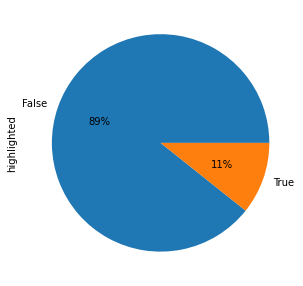

In [24]:
query = """
        SELECT ?contribution, ?highlighted, ?hidden
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P57004 ?research_question_answer.
                OPTIONAL{?research_question_answer orkgp:P55039 ?highlighted.
                         ?research_question_answer orkgp:P55038 ?hidden.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data['highlighted'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))

Dieses Diagramm zeigt den Anteil, wie oft eine Antwort auf eine Forschungsfrage explizit im Text angegeben wird. Dabei ist erkennbar, dass nur 11% der Studien die Antwort im Text hervorheben.

### 2.9 Wie hoch ist der Anteil von systematischen Studien(SLR, mapping study...)? <a id="q9"></a>

<AxesSubplot:ylabel='methods'>

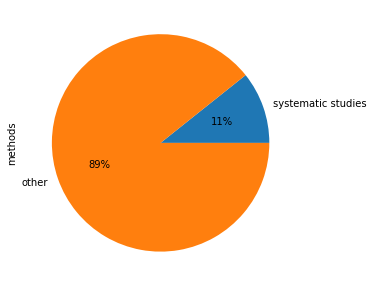

In [25]:
query = """
        SELECT ?contribution, ?secondary
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              OPTIONAL{?contribution orkgp:P56008/orkgp:P57021/rdfs:label ?secondary.
              FILTER regex(?secondary, "(literature|systematic)", "i")}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_systematic_studies = data['secondary'].value_counts().sum()
systematic_studies = pd.DataFrame({'methods':[number_systematic_studies, len(data) - number_systematic_studies]}, index=['systematic studies', 'other'])
systematic_studies.plot(kind='pie', y='methods', autopct='%1.0f%%', figsize=(5,5), legend=False)

Dieses Diagramm zeigt den Anteil von verwendeten systematischen Studien, wie Systematische Literaturrecherchen oder Systematische Mappingstudien, im vergleich zu den anderen Forschungsmethoden. Dabei machen diese Studien 11% der Forschungsmethoden aus.

### 2.10 Verwenden Forschungen mehr als eine Forschungsmethode? <a id="q10"></a>

Insgesamt verwenden 15 Forschungen mehr als eine Forschungsmethode


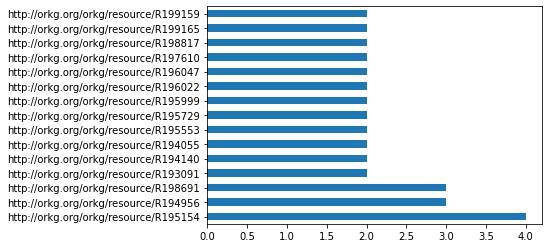

In [26]:
query = """
        SELECT ?contribution, ?collection
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/rdfs:label ?collection.
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data = data[data['collection'] != 'collection']
combined = data[data.duplicated(['contribution'], keep=False)]
#controlled experiement was used two times in one study, only one method so drop those rows
combined = combined.drop_duplicates(keep=False)
research_number = combined['contribution'].drop_duplicates().value_counts().sum()
combined['contribution'].value_counts().plot(kind='barh')
print('Insgesamt verwenden {number} Forschungen mehr als eine Forschungsmethode'.format(number=research_number))

Dieses Diagramm zeigt die Studien, die zwei oder mehr unterschiedliche Forschungsmethoden verwende. Insgesamt nutzen 15 Forschungen mehr als eine Forschungsmethode. 12 Forschungen nutzen zwei Forschungsmethoden, Zwei Forschungen haben drei Forschungsmethoden verwendet, eine Forschung vier Forschungsmethoden.

### 2.11 Welche Forschungsmethoden werden Kombiniert? <a id="q11"></a>

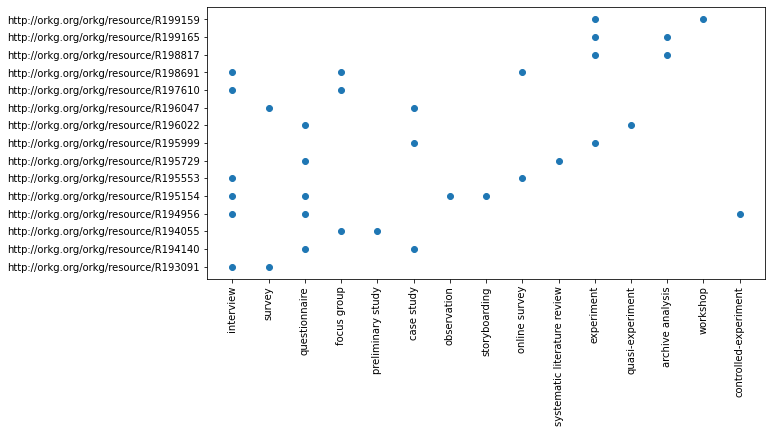

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(x=combined['collection'], y=combined['contribution'])
plt.xticks(rotation=90)
plt.show()

Dieses Diagramm zeigt die Studien, die mehr als eine Forschungsmethode verwendet haben und welche Methoden in dieser Studie kombiniert wurden. Hierbei ist zu erkennen, dass Interviews oft in Kombination mit anderen Fragemethoden, wie Umfragen oder Fragebögen, oder aber auch Fokusgruppen kombiniert werden. Experimente werden in Verbindung mit Archivanalysen, Fallstudien oder Fragebögen verbunden. 

### 2.12 Welche Kombinationen aus Datensammlungsmethoden und Analysemethoden werden verwendet? <a id="q12"></a>

In [28]:
query = """
        SELECT ?experiment, ?study, ?survey, ?secondary_research, ?interview, ?action_research, ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                OPTIONAL{?contribution orkgp:P56008/orkgp:P1007 ?experiment.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57040 ?study.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57036 ?survey.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57021 ?secondary_research.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57034 ?interview.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57020 ?action_research}

                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)

<AxesSubplot:title={'center':'Analysis method in combination with Action Research'}, ylabel='usage'>

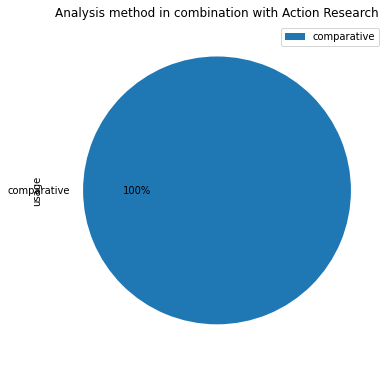

In [29]:
#Action research with analysis methods
methods = []
amount = []
action_reserach_data = data[~data['action_research'].isnull()]
for col in range(6, len(action_reserach_data.columns)):
        if action_reserach_data[action_reserach_data.columns[col]].value_counts().sum() != 0:
                methods.append(action_reserach_data.columns[col])
                amount.append(action_reserach_data[action_reserach_data.columns[col]].value_counts().sum())
action_reserach_data = pd.DataFrame({'usage': amount}, index=methods)
action_reserach_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,7), title="Analysis method in combination with Action Research")

<AxesSubplot:title={'center':'Analysis method in combination with Secondary Research'}, ylabel='usage'>

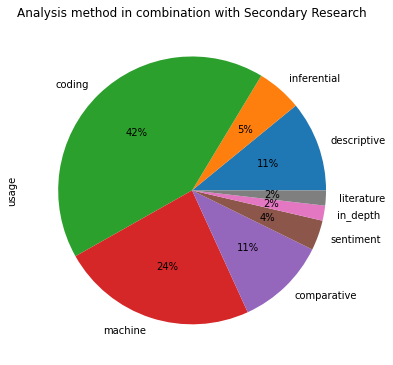

In [30]:
#secondary research with analysis methods
methods = []
amount = []
secondary_research_data = data[~data['secondary_research'].isnull()]
for col in range(6, len(secondary_research_data.columns)):
        if secondary_research_data[secondary_research_data.columns[col]].value_counts().sum() != 0:
                methods.append(secondary_research_data.columns[col])
                amount.append(secondary_research_data[secondary_research_data.columns[col]].value_counts().sum())
secondary_research_data = pd.DataFrame({'usage': amount}, index=methods)
secondary_research_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,7), legend=False, title="Analysis method in combination with Secondary Research")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Sekundärer Forschung verwendet werden. Hirebi wird vor allem Coding mit einem Anteil von 42%, verwendet. Machine learning macht mit einem Anteil von 24% fast ein viertel der Analysemethoden aus. Vergleichende Analyse sowie deskriptive Analyse Methoden haben jeweils einen Anteil von 11%, gefolgt von inferenz statistischen Methoden (5%) und Sentimentanalyse (4%). Literature Analyse und in-depth-Analyse haben jeweils nur einen Anteil von 2%.

<AxesSubplot:title={'center':'Analysis methods in combination with Studies'}, ylabel='usage'>

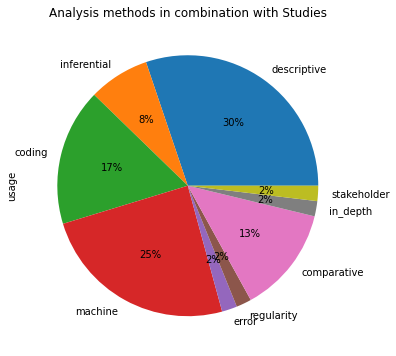

In [31]:
#study with analysis methods
types = []
amount = []
study_data = data[~data['study'].isnull()]
for col in range(6, len(study_data.columns)):
        if study_data[study_data.columns[col]].value_counts().sum() != 0:
                types.append(study_data.columns[col])
                amount.append(study_data[study_data.columns[col]].value_counts().sum())
study_data = pd.DataFrame({'usage': amount}, index=types)
study_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), legend=False, title="Analysis methods in combination with Studies")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Studien verwendet werden. Studien werden hauptsächlich mit deskriptive Analysemethoden (30%), machine learning (25%) und Coding (17%) analysiert. Vergleichende Analyse hat mit 13% auch einen größeren Anteil in der Analyse von Studien. Error analyse, Stakeholder-Analyse, in-depth-Analyse sowie Regelmäßigkeitsanalyse besitzen jeweils einen Anteil von 2%.

<AxesSubplot:title={'center':'Analysis method in combination with Interviews'}, ylabel='usage'>

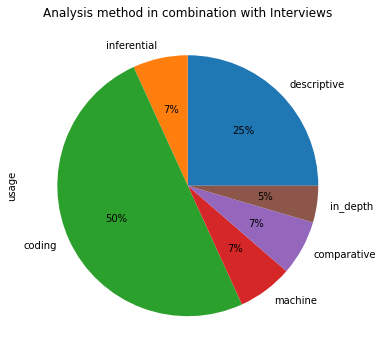

In [32]:
#interviews with analysis methods
methods = []
amount = []
interview_data = data[~data['interview'].isnull()]
for col in range(6, len(interview_data.columns)):
        if interview_data[interview_data.columns[col]].value_counts().sum() != 0:
                methods.append(interview_data.columns[col])
                amount.append(interview_data[interview_data.columns[col]].value_counts().sum())
interview_data = pd.DataFrame({'usage': amount}, index=methods)
interview_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), legend=False, title="Analysis method in combination with Interviews")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Interviews verwendet werden. Dabei wird mit 50% am häufigsten mit dem Einsatz von Coding analysiert gefolgt von  deskriptiven Analysemethoden mit 26%. Statistische Inferenz, machine learning und vergleichende Analyse haben jeweils einen Anteil von 7% und in-depth Analyse hat einen Anteil von 4% 

<AxesSubplot:title={'center':'Analysis method in combination with Surveys'}, ylabel='usage'>

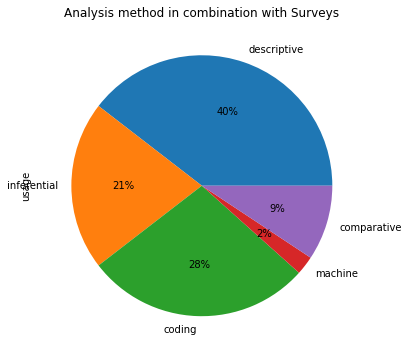

In [33]:
#survey with analysis methods
methods = []
amount = []
survey_data = data[~data['survey'].isnull()]
for col in range(6, len(survey_data.columns)):
        if survey_data[survey_data.columns[col]].value_counts().sum() != 0:
                methods.append(survey_data.columns[col])
                amount.append(survey_data[survey_data.columns[col]].value_counts().sum())
survey_data = pd.DataFrame({'usage': amount}, index=methods)
survey_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), legend=False, title="Analysis method in combination with Surveys")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Umfragen verwendet werden. Bei Umfragen werden am häufigsten deskriptive Analysemethoden (39%) verwendet, gefolgt von Coding (27%) und statistischer Inferenz (22%). Vergleichende Analyse hat einen Anteil von 10% und machine learning wird mit einem Anteil von 2% nur sehr wenig bei der Analyse von Umfragen eingesetzt.

<AxesSubplot:title={'center':'Analysis methods in combination with Experiment'}, ylabel='usage'>

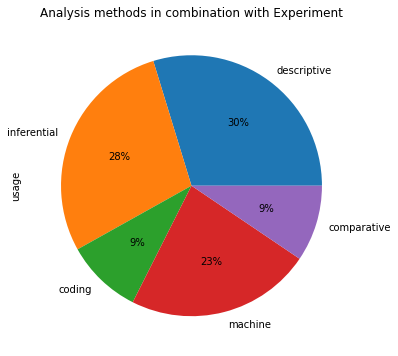

In [34]:
#experiment with analysis methods
methods = []
amount = []
experiment_data = data[~data['experiment'].isnull()]
for col in range(6, len(experiment_data.columns)):
        if experiment_data[experiment_data.columns[col]].value_counts().sum() != 0:
                methods.append(experiment_data.columns[col])
                amount.append(experiment_data[experiment_data.columns[col]].value_counts().sum())
experiment_data = pd.DataFrame({'usage': amount}, index=methods)
experiment_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), legend=False, title="Analysis methods in combination with Experiment")

In diesem Diagramm werden die Analysemethoden dargestellt, die in Kombination mit Experimenten verwendet werden. Dabei machen deskriptive Analysemthoden mit 30%, statistische Inferenz mit 28% und machine learning mit 23% den größten Anteil der Analysmethoden aus. Coding und vergleichende Analyse besitzen jeweils einen Anteil von 9% bei der Analyse von Experimenten.

## 3. Fazit <a id="fazit"></a>

Mit dieser Analyse können die aufgestellten Fragen beantwortet werden.<br>
**1.** Forscher verwenden Experimente, Studien, sekundäre Forschung, Interviews, Umfragen sowie Aktionsforschung als empirische Forschungsmethoden. Dabei werden am häufigsten Experimente (26%) genutzt, gefolgt von Studien (21%), sekundärer Forschung (20%) und Interviews (19%). Die Methode Umfrage hat einen Anteil von 13% und Aktionsforschung nur einen Anteil von 1%.<br>
**2.** **Sekundäre Forschung:** Sekundäre wurde in den Jahren 2015-2019 jeweils 3-mal als Forschunsmethode verwendet, mit Ausnahme von 2017. Dort stieg die Nutzung auf ein maximum von 9-mal an. Ab 2020 stieg die Nutzung an und errichte in 2021 ebenfalls das maximum von 9-mal.<br>
**Studien:** Studien wurden 2015 mit einem maximum von 8-mal verwendet. Die Nutzung halbierte sich im darauffolgenden Jahr. 2017 wurde wieder das maximum erreicht. Danach ist die Nutzung gesunken und erreicht 2019 ein minimum von 2-mal. 2020 stieg die Nutzung auf 6-mal an, halbierte sich im folgenden Jahr aber wieder.<br>
**Interviews:** Die Nutzung dieser Methode ist vom 2-mal im Jahr 2015 auf ein maximum von 7-mal angestiegen und blieb Bis 2019 konstant. 2019 sinkt die Verwendung stark ab und erreicht ein minimum von 1-mal. Im Jahr 2020 stieg die Nutzung auf 6-mal an, hlabierte sich im darauffolgenden Jahr aber wieder.<br>
**Umfragen:** Die Nutzung von Umfragen ist in den Jahren von 2015-2017 auf ein maximum von gestiegen und wurde 8-mal verwendet. Bis 2020 ist die Nutzung auf ein minimum einem mal gesunken. 2021 wurde diese Methode dann 2-mal verwendet.<br>
**Experimente:** Zwischen 2015 und 2018 wurde blieb die Verwendung beständig zwischen 6- und 7-mal. 2019 stieg diese auf ein maximum von 9-mal an und ist im darauffolgenden Jahr auf ein minimum von 2-mal gesunken. 2021 stieg die Nutzung wieder auf 8-mal an.<br>
**3.** Aus den Ergebnissen der dritten Frage geht hervor, dass der Anteil der Forschunsmethoden Umfragen, Fallstudien und Aktionsforschung bei 24% liegt, also fast ein Viertel aller verwendeten Forschungsmethoden ausmacht.<br>
**4.** Die Nutzung von Fallstudien ist von 5-mal im Jahr 2015 auf ein minimum von 1-mal im Jahr 2015 gesunken. 2020 stieg die Anzahl der Verwendungen auf 4-mal an und halbierte sich 2021 wieder. Von 2015-2017 ist die Verwendung von Umfragen von 2-mal auf ein maximum von 8-mal angestiegen. Danach ist die Nutzung stetig gesunken und erreicht in 2020 ein minimum mit einer Nutzung von 1-mal. 2021 ist die Verwendung dieser Methode auf 2-mal angestiegen. Aktionsforschung wurde 2018 1-mal verwendet.<br>
**5.** Die Ergebnisse der fünften Frage zeigen, dass Forscher zehn unteschiedliche deskriptive Analysemethoden benutzen. Hierbei vor allem häufig Prozentangaben und Zählungen mit über 30-mal, sowie den Durchschnitt mit 20-mal. Auch verwenden sie eine Vielzahl von unterschiedlichen Hypothesen-Tests. Häufog wurden der Wilcoxon signed-rank test, und der Mann-Whitney-U-Test verwendet, mit einer Nutzung von über 5-mal, gefolgt vom t-Test mit 5-mal und der Spearman rank-order correlation sowie dem Shapiro-wilk normality Test mit 4-mal. Auch Regressionsanalyse wird verwendet, dabei wurden multi-level, multiple und lineare Regression verwendet.<br>
**6.** **Deskriptive Analysemethoden:** Zwischen 2015 und 2017 wurden am häufigsten Prozentangaben und Zählungen verwendet, im maximum 15-mal. 2018 ist die Nutzung dieser Methoden stark gesunken und wurde 2019-2021 jeweils nur 2-mal verwendet. Die Verwendung der Methoden maximum, minimum, Median und Durchschnitt ist, mit Ausnahme von 2016, bis 2018  von 3-mal auf 5-mal gestiegen. In den zwei folgenden Jahren ist die Nutzung auf ein minimium von 1-mal gesunken. Im Jahr 2021 erreicht die Nutzung dieser Methoden ein maximum von 6-mal. Die Nutzung der Methoden Varianz, standard Abweichung, kurtosis und skewness stigt im Zeitraum 2015-2018 von 1-mal auf ein maximum von 3-mal. In den Jahren 2019 und 2021 wurden diese Methoden nur 1-mal verwendet, 2020 gar nicht.<br>
**Inferenz Statistik:** 2015 wurden Hypothesentests 7-mal verwendet. Die Nutzung sinkt danach auf 3-mal im Jahr 2016. 2017 steigt die Nutzung sehr stark und erreicht ein maximum von 16-mal und sinkt im darauffolgenden Jahr auch wieder stark und wurde nur noch 6-mal verwendet. 2019 stiegt die Nutzung mit 15-mal wieder stark an, sinkt danach wieder stark und erreicht im darauffolgenden Jahr ein minimum von 3-mal. 2021 steigt die Nutzung wieder auf 7-mal an. Regressionsanalysen wurden nur in den Jahren 2016 (1-mal), 2017 (2-mal) und 2021 (2-mal) verwendet.<br>
**7.** Die Ergebenisse zeigen, dass 31% der Forscher Rohdaten, Materialien und Ergebnisse ihrer Studie veröffentlichen und anderen Forschern zur Verfügung stellen. Forscher veröffentlichen mit über 25-mal am häufigsten Datensätze, Materialien wurden über 15-mal und Source Code über 5-mal veröffentlicht.<br>
**8.** Forscher geben zu 11% eine explizite Antwort auf die festgelegten Forschunsfragen in ihrer Studie.<br>
**9.** Systematische Studien, wie literaturrecherchen oder Mappingstudien, werden zu einem Anteil von 11% als Forschungsmethode einer Studien verwendet.<br>
**10.** Die Ergebnisse zeigen, dass 15 Forschungen mehr als eine Forschungsmethode verwenden. 12 verwenden dabei zwei Forschungsmethoden, zwei drei Forschungsmethoden und eine verwendet vier Methoden.<br>
**11.** Die Forschungsmethode Interviews wird häufig mit anderen Fragemethoden kombiniert, wie Umfragen oder Fragebögen. Experimente werden mit Archivanalysen, Fallstudien und auch Fragebögen verbunden. In Kombination mit Fallstudien werden Umfragen und Fragebögen verwendet.<br>
**12.** In den Ergebnissen ist zusehen, dass die Methoden für die Datensammlung unterschiedliche Analysemethoden verwenden. In Kombination mit sekundärer Forschung wird am häufigsten Coding (42%) und Machine Learning(24%) verwendet. Machine Learning hat einen größeren Anteil, da diese vor allem in Verbindung mit Daten aus Archivanalysen, wie z.B. Daten von Onlineplattformen wie Twitter oder Reddit, verwendet werden. Studien werden hauptsächlich mit deskriptiven Methoden analysiert (30%), gefolgt von der Analyse mit Machine Learning (25%). Bei der Analyse von Interviews wird zu 50% Coding verwendet, deskriptive Analysemethoden haben einen Anteil von 25%. Bei der Analyse von Umfragen werden zum größten teil deskriptive Analysmethoden verwendet (40%), gefolgt von Coding (28%) und Inferenz statistischen Methoden(21%). Experimente werden am häufigsten deskriptiv analysiert (30%), inferent statistische Methoden werden zu einem Anteil von 28% verwendet und Machine Learning hat einen Anteil von 23%.<br>

Mit diesem Jupyter Notebook wurde nur ein Teil der aufgestellten Fragem beantwortet. Um die anderen Fragen ebenfalls beanworten zu können, muss die entwickelte semantische Struktur erweitert werden, um die entsprechenden Daten sammeln und analysieren zu können. Außerdem wurden bisher nur Publikationen aus dem Research Track der IEEE International Requirements Engineering Conference untersucht.